In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import simple_features as sf
import os

In [167]:
save_path = "../m2_q1_1_1.png"

In [168]:
def plot_shot_counts_by_distance(df):
    """
    Plots a histogram of shot counts by distance, separating goals and no-goals.

    Parameters:
        df (pd.DataFrame): DataFrame containing columns `distance_from_net` and `is_goal`.
    """
    # Use a more appealing color palette
    custom_palette = {0: "#FF6F61", 1: "#4CAF50"}  # No-Goal: Coral, Goal: Green
    
    plt.figure(figsize=(12, 6))  # Slightly wider figure for better visualization
    sns.histplot(
        data=df, 
        x='distance_from_net', 
        hue='is_goal', 
        bins=30, 
        kde=False, 
        palette=custom_palette,
        alpha=0.7,
        element="bars",  # Switch to bars for a cleaner look
    )
    # Add labels and title
    plt.title("Shot Counts by Distance (Goals vs. No-Goals)", fontsize=16, fontweight="bold")
    plt.xlabel("Distance from Net (Feet)", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(
        title="Shot Outcome", 
        labels=["No-Goal", "Goal"], 
        fontsize=10, 
        title_fontsize=12, 
        loc="upper right"
    )
    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    plt.tight_layout()  # Adjust layout for better spacing
    #plt.show()

        # Save the plot
    plt.savefig("../m2_q1_1_1.png", dpi=300, bbox_inches="tight")
    print(f"Plot saved to {save_path}")

In [169]:
def plot_shot_counts_by_angle(df):
    """
    Plots a histogram of shot counts by angle, separating goals and no-goals.

    Parameters:
        df (pd.DataFrame): DataFrame containing columns `angle_from_net` and `is_goal`.
    """
    # Use a more appealing color palette
    custom_palette = {0: "#FF6F61", 1: "#4CAF50"}  # No-Goal: Coral, Goal: Green
    
    plt.figure(figsize=(12, 6))  # Slightly wider figure for better visualization
    sns.histplot(
        data=df, 
        x='angle_from_net', 
        hue='is_goal', 
        bins=30, 
        kde=False, 
        palette=custom_palette,
        alpha=0.7,
        element="bars",  # Switch to bars for a cleaner look
    )
    # Add labels and title
    plt.title("Shot Counts by Angle (Goals vs. No-Goals)", fontsize=16, fontweight="bold")
    plt.xlabel("Angle from Net (Degrees)", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(
        title="Shot Outcome", 
        labels=["No-Goal", "Goal"], 
        fontsize=10, 
        title_fontsize=12, 
        loc="upper right"
    )
    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    plt.tight_layout()  # Adjust layout for better spacing
    
    # Save the plot
    save_path = "../m2_q1_1_2.png"  # Adjust save path as needed
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"Plot saved to {save_path}")


In [170]:
def plot_2d_histogram_distance_angle(df):
    """
    Plots a 2D histogram of distance vs. angle for all shots.

    Parameters:
        df (pd.DataFrame): DataFrame containing columns `distance_from_net` and `angle_from_net`.
    """
    # Set up the figure size and plot
    plt.figure(figsize=(12, 6))  # Wider visualization
    sns.histplot(
        data=df, 
        x='distance_from_net', 
        y='angle_from_net', 
        bins=(30, 30),  # Adjust bins as necessary
        cbar=True,  # Include a color bar for density
        cmap="viridis"  # Use an appealing color map
    )
    # Add labels and title
    plt.title("2D Histogram of Distance vs. Angle", fontsize=16, fontweight="bold")
    plt.xlabel("Distance from Net (Feet)", fontsize=12)
    plt.ylabel("Angle from Net (Degrees)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Add gridlines for better readability
    plt.grid(axis='both', linestyle='--', alpha=0.6)
    
    plt.tight_layout()  # Adjust layout for better spacing

    # Save the plot
    save_path = "../m2_q1_1_3.png"  # Adjust save path as needed
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"Plot saved to {save_path}")


In [171]:
def plot_goal_rate_by_distance(df):
    """
    Plots the goal rate (#goals / (#goals + #no_goals)) as a function of distance, binned by 5-meter intervals.

    Parameters:
        df (pd.DataFrame): DataFrame containing `distance_from_net` and `is_goal`.
    """
    # Create distance bins of 5 meters
    df['distance_bin'] = pd.cut(df['distance_from_net'], bins=range(0, int(df['distance_from_net'].max()) + 5, 5))
    goal_rate = df.groupby('distance_bin')['is_goal'].mean().reset_index()

    # Extract bin labels for clarity
    goal_rate['distance_bin_mid'] = goal_rate['distance_bin'].apply(lambda x: x.mid)

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=goal_rate, x='distance_bin_mid', y='is_goal', marker='o')
    plt.title("Goal Rate by Distance (Binned by 5 Feets)", fontsize=16, fontweight="bold")
    plt.xlabel("Distance from Net (Feet, Binned by 5)", fontsize=12)
    plt.ylabel("Goal Rate", fontsize=12)
    plt.ylim(0, 1)
    #plt.show()

    plt.grid(visible=True, linestyle='--', alpha=0.7)


    plt.tight_layout()  # Adjust layout for better spacing


    save_path = "../m2_q1_2_1.png"  # Adjust save path as needed
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"Plot saved to {save_path}")

In [172]:
def plot_goal_rate_by_angle(df):
    """
    Plots the goal rate (#goals / (#goals + #no_goals)) as a function of angle, binned by 5-degree intervals.

    Parameters:
        df (pd.DataFrame): DataFrame containing `angle_from_net` and `is_goal`.
    """
    # Create angle bins of 5 degrees
    df['angle_bin'] = pd.cut(df['angle_from_net'], bins=range(int(df['angle_from_net'].min()) - 5, int(df['angle_from_net'].max()) + 5, 5))
    goal_rate = df.groupby('angle_bin')['is_goal'].mean().reset_index()

    # Extract bin labels for clarity
    goal_rate['angle_bin_mid'] = goal_rate['angle_bin'].apply(lambda x: x.mid)

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=goal_rate, x='angle_bin_mid', y='is_goal', marker='o')
    plt.title("Goal Rate by Angle (Binned by 5 Degrees)", fontsize=16, fontweight="bold")
    plt.xlabel("Angle from Net (Degrees, Binned by 5)", fontsize=12)
    plt.ylabel("Goal Rate", fontsize=12)
    plt.ylim(0, 1)
    #plt.show()

    plt.grid(visible=True, linestyle='--', alpha=0.7)


    plt.tight_layout()  # Adjust layout for better spacing


    save_path = "../m2_q1_2_2.png"  # Adjust save path as needed
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"Plot saved to {save_path}")

In [ ]:
def plot_goals_by_distance_empty_net(df):
    """
    Plots a histogram of goals by distance, separating empty net and non-empty net events
    with separate scales for each and a twin axis.
    """
   

    # Filter for goals only
    goals_df = df[df['is_goal'] == 1]

    # Separate data for non-empty net and empty net
    non_empty_net = goals_df[goals_df['empty_net'] == 0]
    empty_net = goals_df[goals_df['empty_net'] == 1]

    extreme_cases = df[(df['is_goal'] == 1) & 
                   (df['distance_from_net'] > 150) & 
                   (df['empty_net'] == 0)]
    print("extreme case:", extreme_cases)


    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot non-empty net goals
    ax1.hist(non_empty_net['distance_from_net'], bins=30, alpha=0.6, color='blue', label='Non-Empty Net')
    ax1.set_xlabel("Distance from Net (Feet)", fontsize=12)
    ax1.set_ylabel("Count (Non-Empty Net Goals)", fontsize=12, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(visible=True, linestyle='--', alpha=0.7)

    # Plot empty net goals on a separate axis
    ax2 = ax1.twinx()
    ax2.hist(empty_net['distance_from_net'], bins=30, alpha=0.6, color='darkorange', label='Empty Net', weights=np.ones(len(empty_net)) * 10)  # Scale up by 10x
    ax2.set_ylabel("Count (Empty Net Goals, Scaled x10)", fontsize=12, color='darkorange')
    ax2.tick_params(axis='y', labelcolor='darkorange')

    # Title and legends
    ax1.set_title("Distribution of Goals by Distance", fontsize=14, weight='bold')
    fig.suptitle("Comparison of Empty-Net and Non-Empty-Net Goals", fontsize=10)
    ax1.legend(["Non-Empty Net"], loc='upper left')
    ax2.legend(["Empty Net (Scaled x10)"], loc='upper right')

    # Adjust layout and display
    fig.tight_layout(pad=3)

    save_path = "../m2_q1_3.png"  # Adjust save path as needed
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"Plot saved to {save_path}")
    plt.show()


Plot saved to ../m2_q1_1_1.png
Plot saved to ../m2_q1_1_2.png
Plot saved to ../m2_q1_1_3.png


/var/folders/nw/jb15k8p55ms_s5kkmwgsvmv40000gn/T/ipykernel_81803/3598036397.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate = df.groupby('distance_bin')['is_goal'].mean().reset_index()


Plot saved to ../m2_q1_2_1.png


/var/folders/nw/jb15k8p55ms_s5kkmwgsvmv40000gn/T/ipykernel_81803/234326054.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate = df.groupby('angle_bin')['is_goal'].mean().reset_index()


Plot saved to ../m2_q1_2_2.png
extreme case:            game_id  event_id event_type  period time_in_period time_remaining  \
373     2016020183       818       goal       5          00:00          05:00   
1017    2016020533       731       goal       5          00:00          05:00   
1018    2016020533       734       goal       5          00:00          05:00   
2192    2016021180       678       goal       4          00:59          04:01   
3010    2016020372       715       goal       3          15:39          04:21   
...            ...       ...        ...     ...            ...            ...   
232916  2018020566       820       goal       5          00:00          00:00   
233656  2018020924       851       goal       5          00:00          00:00   
236203  2018020816       869       goal       5          00:00          00:00   
236459  2018020928       698       goal       5          00:00          00:00   
236485  2018020944       623       goal       3          00:08  

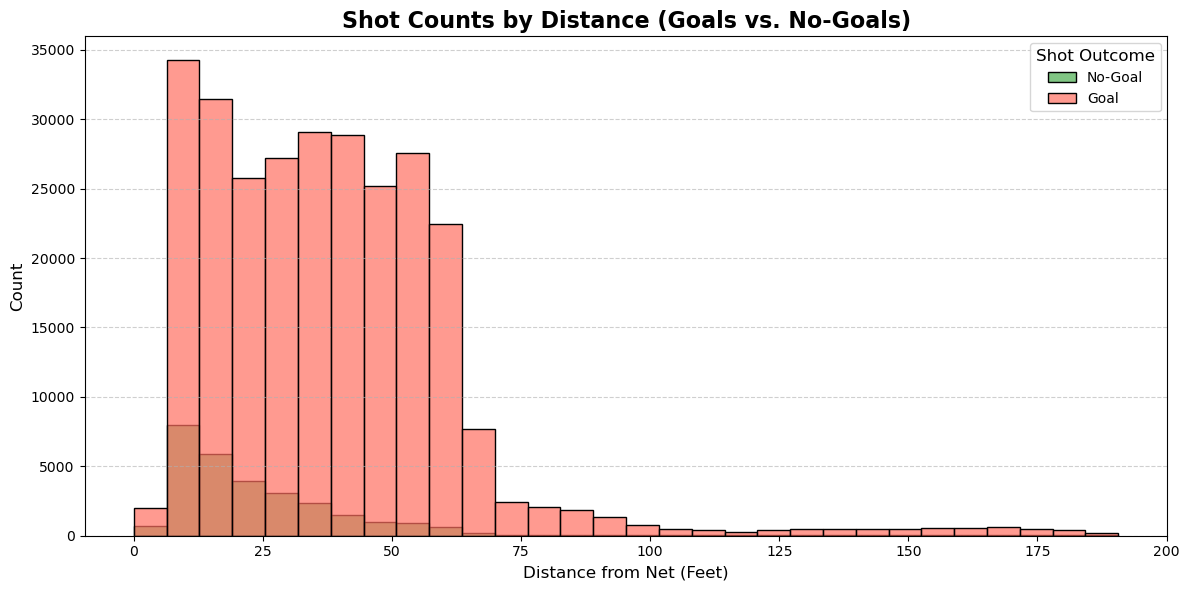

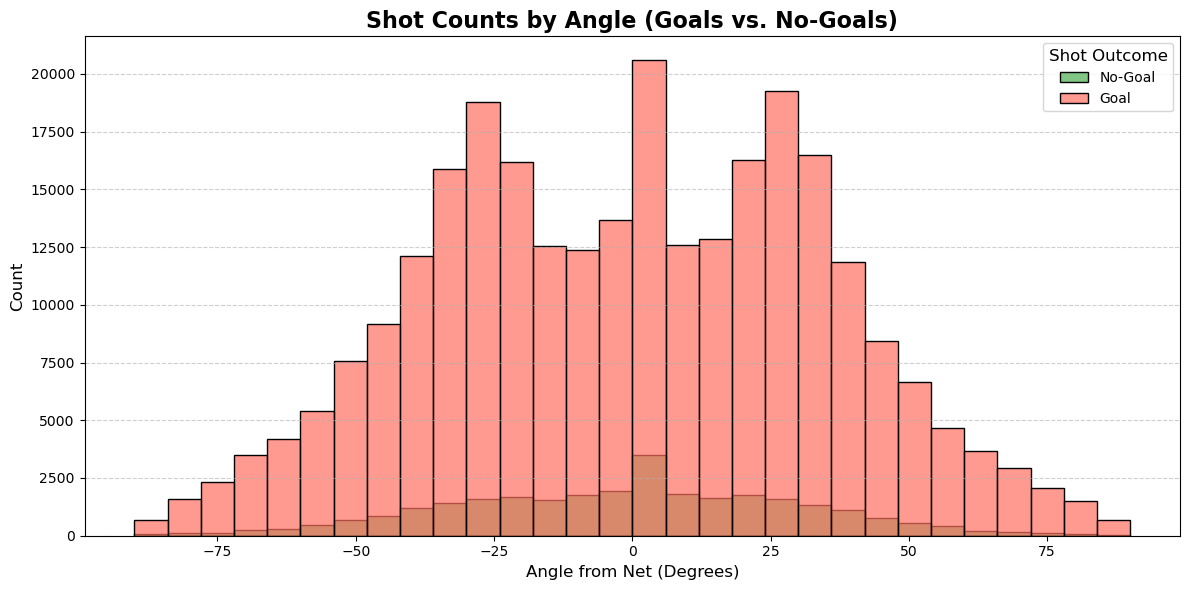

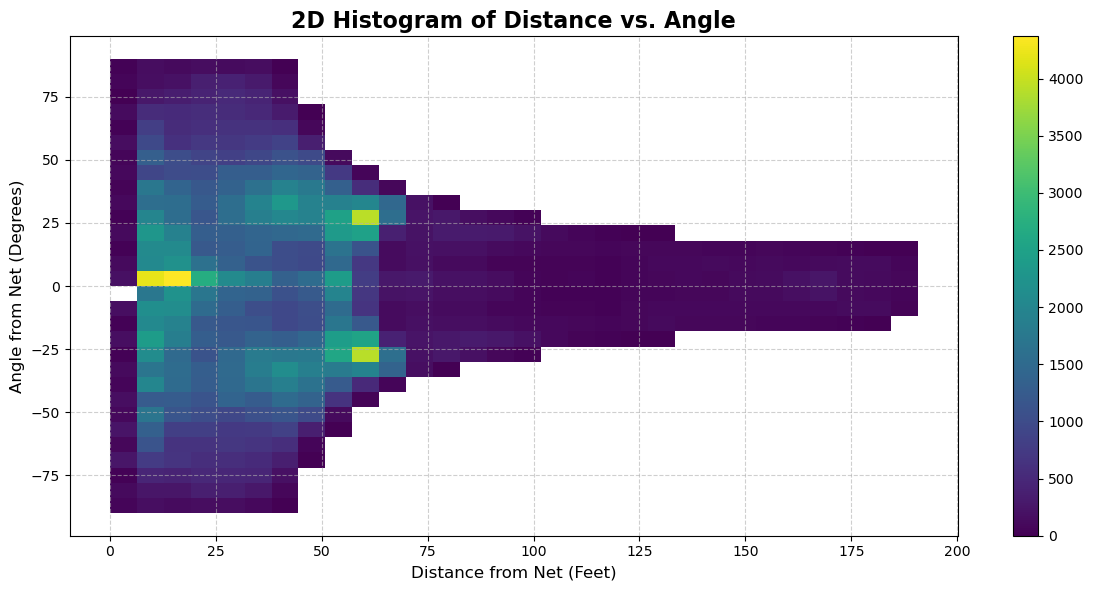

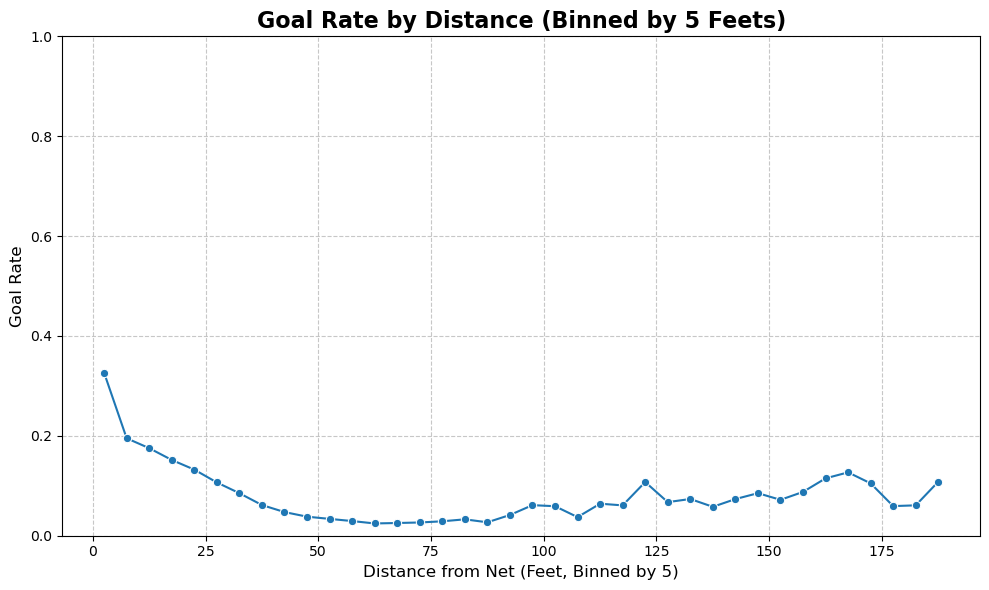

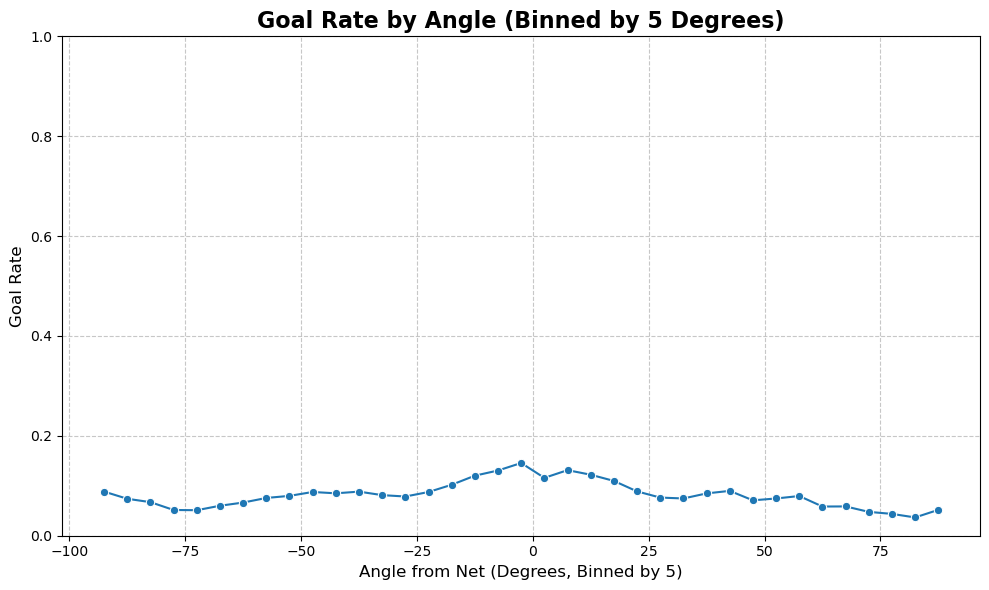

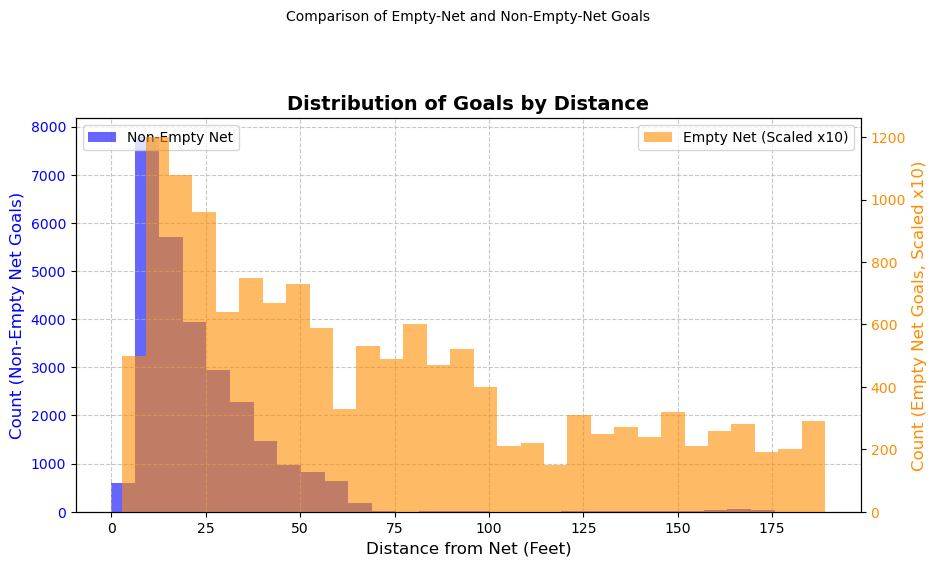

In [174]:
# Load and preprocess your data
df = pd.read_csv('../dataset/simple_engineered/augmented_data.csv')
plot_shot_counts_by_distance(df)
plot_shot_counts_by_angle(df)
plot_2d_histogram_distance_angle(df)
plot_goal_rate_by_distance(df)
plot_goal_rate_by_angle(df)
plot_goals_by_distance_empty_net(df)